<a href="https://colab.research.google.com/github/JhovanyArias/VisionArtificial/blob/main/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se carga la imagen al Drive y e importan librerias necesarias

In [56]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image
import PIL
import matplotlib.image as mpimg
from PIL import Image
import PIL
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Se carga la imagen y se ejecuta el comando para procesar

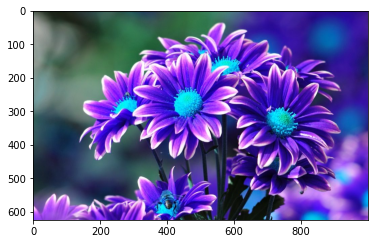

In [2]:
path = "/content/drive/MyDrive/Mi carpetica/flores-bonitas.jpg"
img = cv2.imread(path)
plt.imshow(img)

Normalizar los valores de la imagen

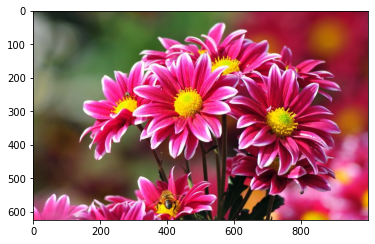

In [ ]:
im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)

Funcion transformar escala de grises

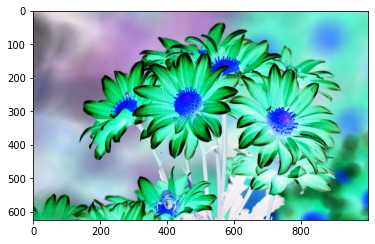

In [ ]:
negativo = Image.open(r'/content/drive/MyDrive/Mi carpetica/flores-bonitas.jpg')
width = negativo.size[0]
heigth = negativo.size[1]
for i in range(0,width):
  for j in range(0,heigth):
    data = negativo.getpixel((i,j))
    red=255-data[0]
    green=255-data[1]
    blue=255-data[2]
    negativo.putpixel((i,j), (red, green, blue))
  
plt.imshow(negativo)

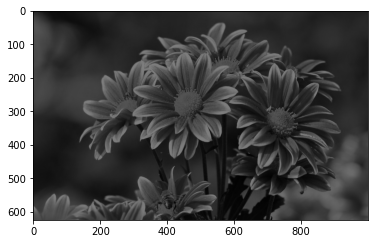

In [ ]:
escaladegrises = Image.open(r'/content/drive/MyDrive/Mi carpetica/flores-bonitas.jpg')
width = escaladegrises.size[0]
heigth = escaladegrises.size[1]
for i in range(0,width):
  for j in range(0,heigth):
    data = escaladegrises.getpixel((i,j))
    red=data[0]
    green=data[1]
    blue=data[2]
    gray=int((red+green+blue)/3)
    escaladegrises.putpixel((i,j), (gray, gray, gray))
  
plt.imshow(escaladegrises)

Version 2 - Negativo

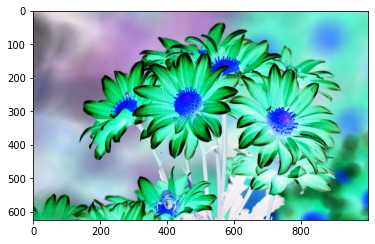

In [ ]:
negativo = Image.open(r'/content/drive/MyDrive/Mi carpetica/flores-bonitas.jpg')
datos = list(negativo.getdata())
datos_invertidos = [(255 - datos[x][0], 255 - datos[x][1], 255 - datos[x][2]) for x in range(len(datos))]
imagen_invertida = Image.new('RGB', negativo.size)
imagen_invertida.putdata(datos_invertidos)
plt.imshow(imagen_invertida)

Version 2 - Escala de grises

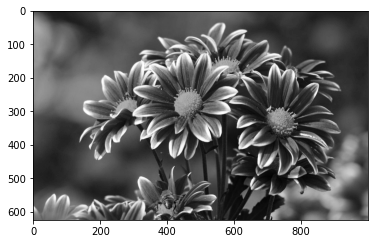

In [ ]:
path = "/content/drive/MyDrive/Mi carpetica/flores-bonitas.jpg"
img = cv2.imread(path)
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgGray = (0.2989 * R) + (0.5870 * G) + (0.1140 * B)
plt.imshow(imgGray, cmap='gray')
plt.show()

Umbralizacion de Imagenes

Algoritmo que tome cada pixel y lo ubique dentro de un rango

Prueba

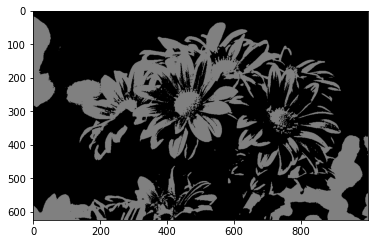

In [ ]:
prueba = Image.open(r'/content/drive/MyDrive/Mi carpetica/flores-bonitas.jpg')
width = prueba.size[0]
heigth = prueba.size[1]
for i in range(0,width):
  for j in range(0,heigth):
    data = prueba.getpixel((i,j))
    red=data[0]
    green=data[1]
    blue=data[2]
    gray=int((red+green+blue)/3)
    if gray < 128:
      gray=0
    else:
      gray=128

    prueba.putpixel((i,j), (gray, gray, gray))
  
plt.imshow(prueba)

Referencia

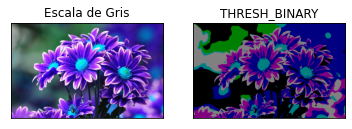

In [ ]:
path = "/content/drive/MyDrive/Mi carpetica/flores-bonitas.jpg"
img = cv2.imread(path)
ret,thresh1 = cv2.threshold(img,100,128,cv2.THRESH_BINARY)

images = [img, thresh1]
titles = ['Escala de Gris','THRESH_BINARY']
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

Segmentar una imagen

Tomar la imagen y filtrar por colores y al final solo usar el color amarillo
Crear una mascara que seleccione solo el color amarillo en cada uno de los 3 canales de la imagen
Multiplicar cada punto de la imagen por la mascara
Si hay amarillo el valor del pixel se multiplica por 1 y si no hay amarillo queda 0

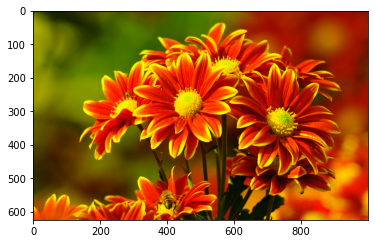

In [ ]:
#Prueba 1

prueba = Image.open(r'/content/drive/MyDrive/Mi carpetica/flores-bonitas.jpg')
datos = list(prueba.getdata())
datos_invertidos = [(datos[x][0], datos[x][1], datos[x][2]-datos[x][2]) 
for x in range(len(datos))]
imagen_prueba = Image.new('RGB', prueba.size)
imagen_prueba.putdata(datos_invertidos)
plt.imshow(imagen_prueba)

In [55]:
#Prueba 2

prueba = Image.open(r'/content/drive/MyDrive/Mi carpetica/flores-bonitas.jpg')
width = prueba.size[0]
heigth = prueba.size[1]
for i in range(0,width):
  for j in range(0,heigth):
    data = prueba.getpixel((i,j))
    red=data[0]
    green=data[1]
    blue=data[2] - data[2]
    prueba.putpixel((i,j), (red, green, blue))
  
plt.imshow(prueba)

NameError: ignored

Division del mapa de colores en canales RGB

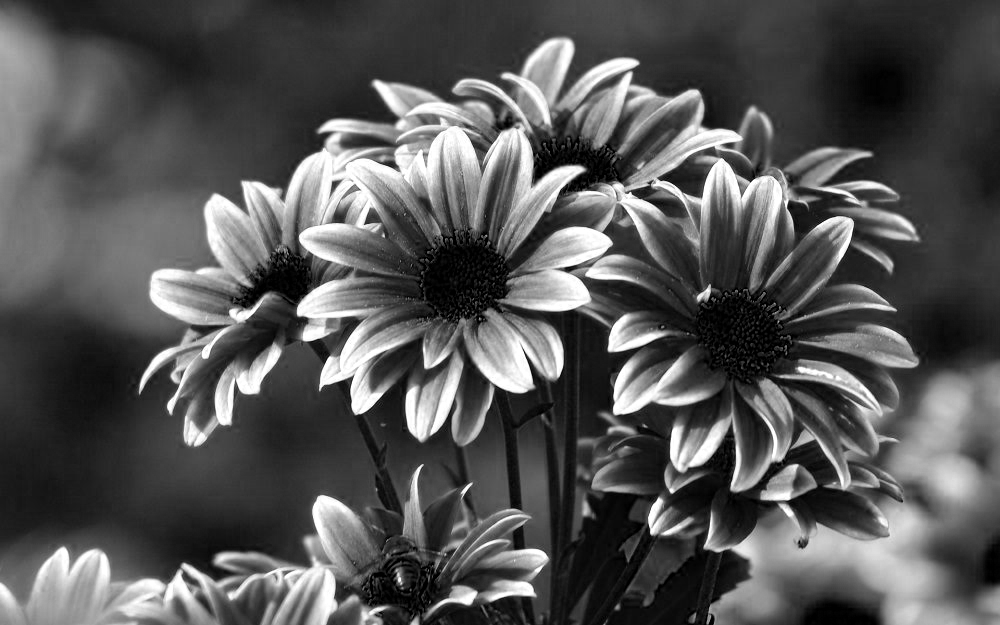

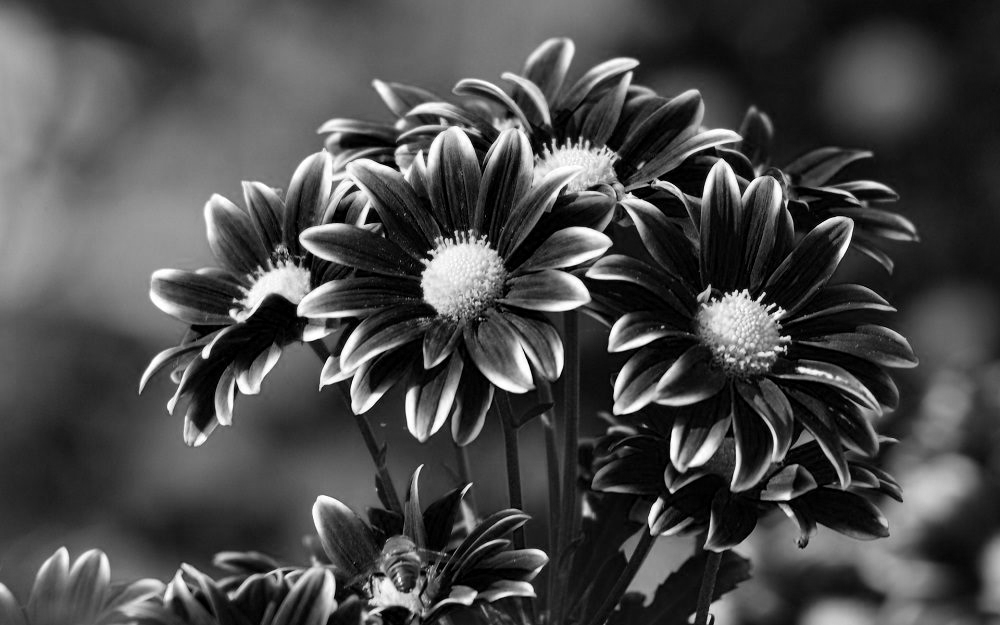

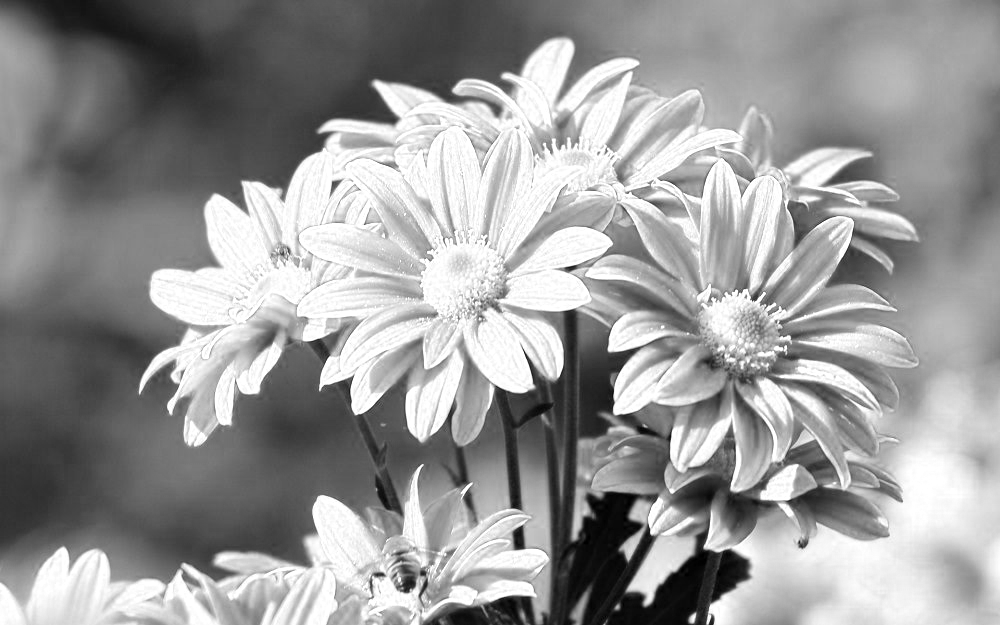

In [4]:
B,G,R = cv2.split(img)
cv2_imshow(B)
cv2_imshow(G)
cv2_imshow(R)

Se usa mascara en cada canal RGB

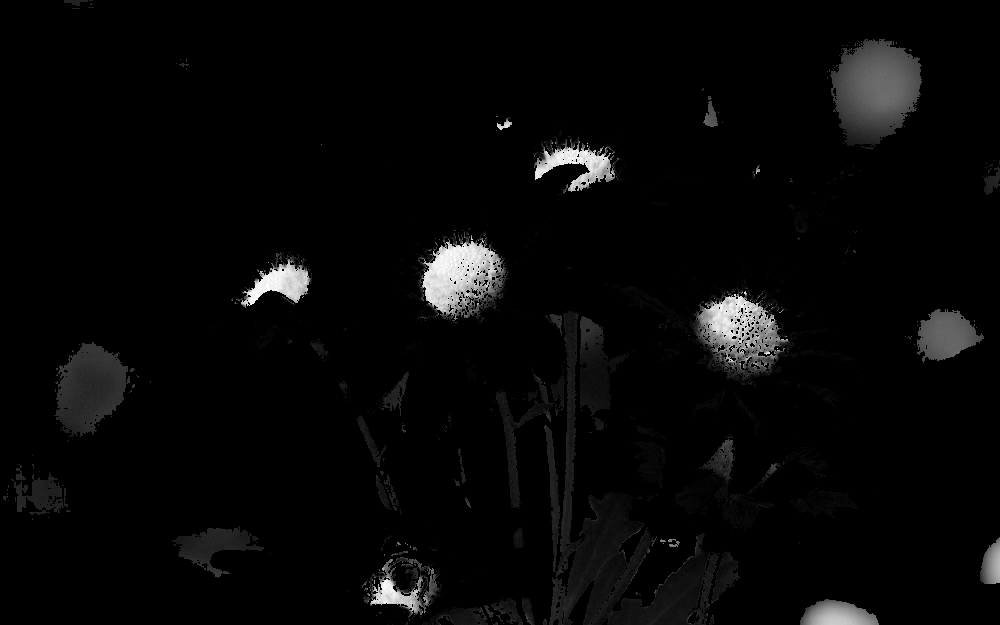

In [7]:
imgFilter = np.zeros((B.shape[0],B.shape[1]))
for i in range(B.shape[0]):
  for j in range(B.shape[1]):
    if B[i,j] < 25:
      imgFilter[i,j] = 1
    else:
      imgFilter[i,j] = 0

NewB = np.zeros((B.shape[0],B.shape[1]))
NewG = np.zeros((B.shape[0],B.shape[1]))
NewR = np.zeros((B.shape[0],B.shape[1]))
for i in range(B.shape[0]):
  for j in range(B.shape[1]):
    NewB[i,j] = imgFilter[i,j] * B[i,j]
    NewG[i,j] = imgFilter[i,j] * G[i,j]
    NewR[i,j] = imgFilter[i,j] * R[i,j]
cv2_imshow(NewG)

Se aplica mascara para la imagen

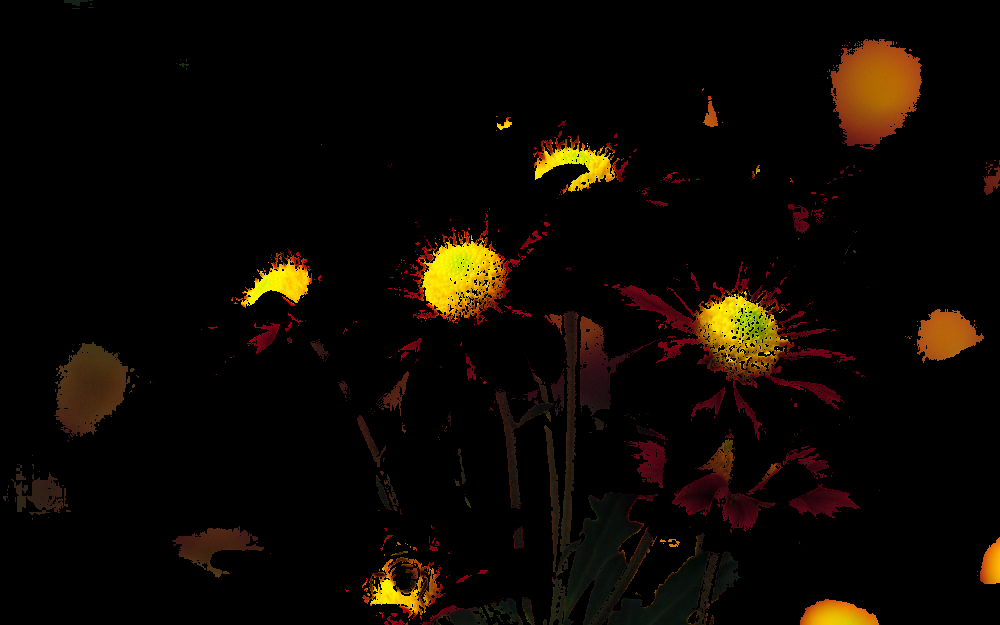

In [8]:
image = cv2.merge([NewB,NewG,NewR])
cv2_imshow(image)

Convertir imagen a escala de grises
Mostrar histograma para tonalidades de colores de 64 32 16 8 4 2

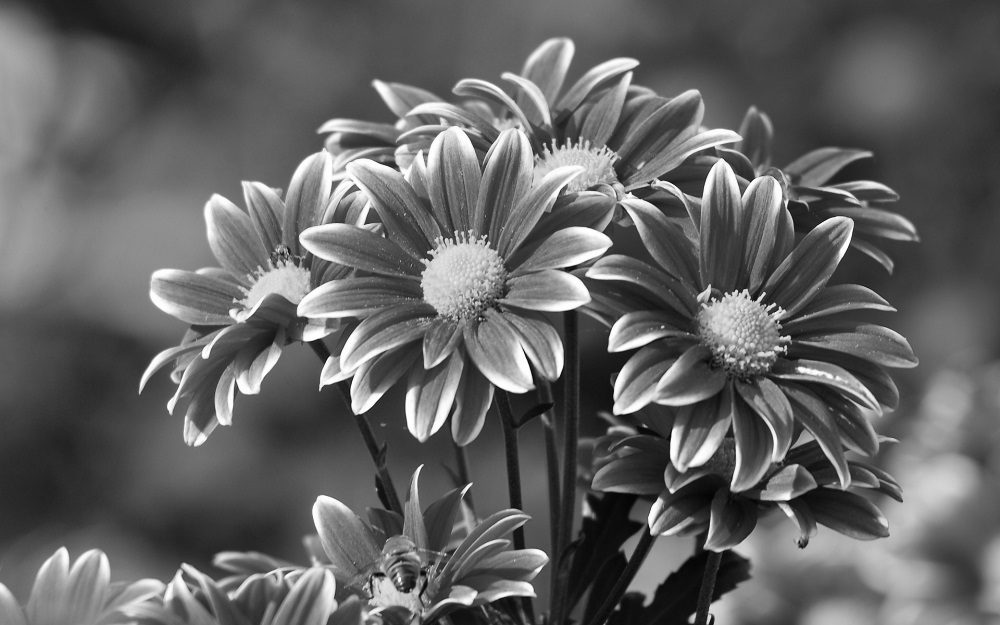

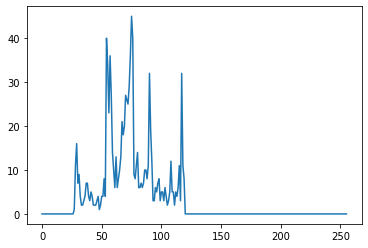

In [29]:
from skimage import color
from skimage import io

imgGray = cv2.imread('/content/drive/MyDrive/Mi carpetica/flores-bonitas.jpg',0)
cv2_imshow(imgGray)
hist = cv2.calcHist(imgGray,[0],None, [256],[0,256])
plt.plot(hist)
plt.show()

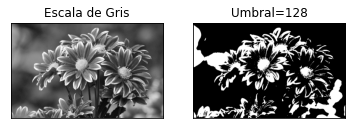

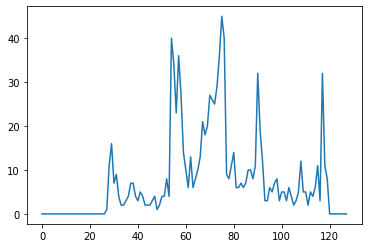

In [71]:
ret,thresh1 = cv2.threshold(imgGray,128,256,cv2.THRESH_BINARY)
images = [imgGray, thresh1]
titles = ['Escala de Gris','Umbral=128']
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()
hist = cv2.calcHist(imgGray,[0],None, [128],[0,128])
plt.plot(hist)
plt.show()

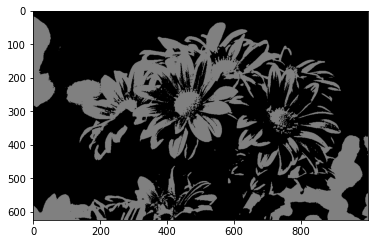

In [79]:
prueba = Image.open(r'/content/drive/MyDrive/Mi carpetica/flores-bonitas.jpg')
width = prueba.size[0]
heigth = prueba.size[1]
for i in range(0,width):
  for j in range(0,heigth):
    data = prueba.getpixel((i,j))
    red=data[0]
    green=data[1]
    blue=data[2]
    gray=int((red+green+blue)/3)
    if gray < 128:
      gray=0
    else:
      gray=128

    prueba.putpixel((i,j), (gray, gray, gray))
plt.imshow(prueba)